In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('Classified Data')

In [3]:
df.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
Unnamed: 0      1000 non-null int64
WTT             1000 non-null float64
PTI             1000 non-null float64
EQW             1000 non-null float64
SBI             1000 non-null float64
LQE             1000 non-null float64
QWG             1000 non-null float64
FDJ             1000 non-null float64
PJF             1000 non-null float64
HQE             1000 non-null float64
NXJ             1000 non-null float64
TARGET CLASS    1000 non-null int64
dtypes: float64(10), int64(2)
memory usage: 93.8 KB


In [5]:
df['TARGET CLASS'].value_counts()

1    500
0    500
Name: TARGET CLASS, dtype: int64

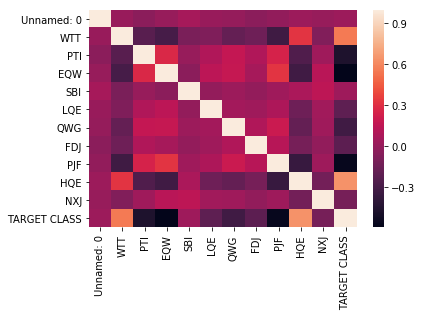

In [6]:
sns.heatmap(df.corr())

In [7]:
df.drop(['Unnamed: 0','SBI'],axis=1,inplace=True)

In [8]:
df.head()

,WTT,PTI,EQW,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [10]:
df.columns

Index(['WTT', 'PTI', 'EQW', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ',
       'TARGET CLASS'],
      dtype='object')

In [11]:
X=df[['WTT', 'PTI', 'EQW', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ']]

In [12]:
y=df['TARGET CLASS']

In [13]:
from sklearn.model_selection import train_test_split
n.

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=101)

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
model=KNeighborsClassifier()

In [18]:
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [19]:
y_pred=model.predict(X_test)

In [20]:
from sklearn.metrics import confusion_matrix

In [21]:
confusion_matrix(y_test,y_pred)

array([[151,   8],
       [  9, 132]], dtype=int64)

In [22]:
error_list=[]

for i in range(1,40):
    knn=KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    ypred=knn.predict(X_test)
    error_list.append(np.mean(ypred!=y_test))

In [23]:
error_list

[0.07,
 0.08666666666666667,
 0.06666666666666667,
 0.07666666666666666,
 0.056666666666666664,
 0.06,
 0.06,
 0.056666666666666664,
 0.05,
 0.04666666666666667,
 0.05,
 0.04666666666666667,
 0.05,
 0.05,
 0.04666666666666667,
 0.05,
 0.05,
 0.04666666666666667,
 0.04666666666666667,
 0.05,
 0.05,
 0.05,
 0.04666666666666667,
 0.05,
 0.05,
 0.05333333333333334,
 0.056666666666666664,
 0.056666666666666664,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05333333333333334,
 0.04666666666666667,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05]

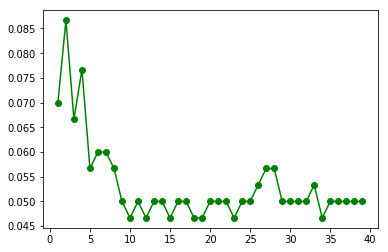

In [24]:
plt.plot(range(1,40),error_list,marker='o',color="green")

In [25]:
knn=KNeighborsClassifier(1)
knn.fit(X_train,y_train)
ypred=knn.predict(X_test)

In [26]:
confusion_matrix(ypred,y_test)

array([[150,  12],
       [  9, 129]], dtype=int64)

In [27]:
knn=KNeighborsClassifier(15)
knn.fit(X_train,y_train)
ypred=knn.predict(X_test)

In [28]:
confusion_matrix(ypred,y_test)

array([[153,   8],
       [  6, 133]], dtype=int64)